<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_DL/blob/main/CaiCai_DL_Week6.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn,optim
import matplotlib.pyplot as plt
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/week4_function")
from torchLearning import *

##**一、经典机器学习的归一化**

###**1.1 0-1标准化**

In [ ]:
t = torch.arange(12).reshape(6,2).float()
t

tensor([[ 0.,  1.],
        [ 2.,  3.],
        [ 4.,  5.],
        [ 6.,  7.],
        [ 8.,  9.],
        [10., 11.]])

In [ ]:
t_max = t.max(0)[0]
t_max   # t.max()返回的第一个参数是值，第二个参数是索引

tensor([10., 11.])

In [ ]:
t_min = t.min(0)[0]

In [ ]:
(t-t_min)/(t_max-t_min)

tensor([[0.0000, 0.0000],
        [0.2000, 0.2000],
        [0.4000, 0.4000],
        [0.6000, 0.6000],
        [0.8000, 0.8000],
        [1.0000, 1.0000]])

###**1.2 Z-score标准化**

In [ ]:
t

tensor([[ 0.,  1.],
        [ 2.,  3.],
        [ 4.,  5.],
        [ 6.,  7.],
        [ 8.,  9.],
        [10., 11.]])

In [ ]:
t.mean(0)

tensor([5., 6.])

In [ ]:
t.std(0) # t.var返回的是方差

tensor([3.7417, 3.7417])

In [ ]:
(t-t.mean(0))/t.std(0)

tensor([[-1.3363, -1.3363],
        [-0.8018, -0.8018],
        [-0.2673, -0.2673],
        [ 0.2673,  0.2673],
        [ 0.8018,  0.8018],
        [ 1.3363,  1.3363]])

##**二、Z-Score实例化对比**

In [37]:
torch.manual_seed(420)


features,labels = tensorGenReg(w=[2,-1],bias=False,deg=2)
features_norm = Z_ScoreNormalization(features)

train_loader, test_loader = split_loader(features,labels)
train_loader_norm, test_loader_norm = split_loader(features_norm,labels)

In [20]:
torch.manual_seed(24)

lr = 0.03
num_epochs = 40

In [21]:
class sigmoid_class3(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4,n_hidden3=4,out_features=1,bias=True):       
        super(sigmoid_class3, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden1,bias=bias)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2,bias=bias)
        self.linear3 = nn.Linear(n_hidden2, n_hidden3,bias=bias)
        self.linear4 = nn.Linear(n_hidden3, out_features,bias=bias) 
        
    def forward(self, x): 
      z1 = self.linear1(x)
      p1 = torch.sigmoid(z1)
      z2 = self.linear2(p1)
      p2 = torch.sigmoid(z2)
      z3 = self.linear3(p2)
      p3 = torch.sigmoid(z3)
      out = self.linear4(p3)
      return out
sigmoid_model3 = sigmoid_class3()
sigmoid_model3_norm = sigmoid_class3()

In [22]:
for m in sigmoid_model3.modules():
  if isinstance(m,nn.Linear):
    nn.init.xavier_uniform_(m.weight)

for m in sigmoid_model3_norm.modules():
  if isinstance(m,nn.Linear):
    nn.init.xavier_uniform_(m.weight)

In [23]:
train_l, test_l = model_train_test(
    sigmoid_model3,
    train_loader,
    test_loader,
    num_epochs=num_epochs,
    criterion=nn.MSELoss(),
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

train_l_norm, test_l_norm = model_train_test(
    sigmoid_model3_norm,
    train_loader_norm,
    test_loader_norm,
    num_epochs=num_epochs,
    criterion=nn.MSELoss(),
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

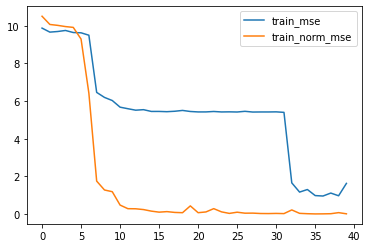

In [24]:
plt.plot(list(range(num_epochs)),train_l,label="train_mse")
plt.plot(list(range(num_epochs)),train_l_norm,label="train_norm_mse")
plt.legend(loc=1)

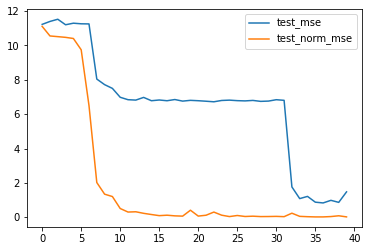

In [25]:
plt.plot(list(range(num_epochs)),test_l,label="test_mse")
plt.plot(list(range(num_epochs)),test_l_norm,label="test_norm_mse")
plt.legend(loc=1)

In [29]:
torch.manual_seed(24)  


# 关键参数
lr = 0.03
num_epochs = 5


# 实例化模型
sigmoid_model3 = sigmoid_class3() 
sigmoid_model3_norm = sigmoid_class3()  


# 进行Xavier初始化
for m in sigmoid_model3.modules():
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        
for m in sigmoid_model3_norm.modules():
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)


# sigmoid_model2模型训练
train_l, test_l = model_train_test(sigmoid_model3, 
                                   train_loader,
                                   test_loader,
                                   num_epochs = num_epochs, 
                                   criterion = nn.MSELoss(), 
                                   optimizer = optim.SGD, 
                                   lr = lr, 
                                   cla = False, 
                                   eva = mse_cal)

# sigmoid_model2_norm模型训练
train_l_norm, test_l_norm = model_train_test(sigmoid_model3_norm, 
                                             train_loader_norm,
                                             test_loader,
                                             num_epochs = num_epochs, 
                                             criterion = nn.MSELoss(), 
                                             optimizer = optim.SGD, 
                                             lr = lr, 
                                             cla = False, 
                                             eva = mse_cal)

train_l_norm, test_l_norm = model_train_test(
    sigmoid_model3_norm,
    train_loader_norm,
    test_loader_norm,
    num_epochs=5,
    criterion=nn.MSELoss(),
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

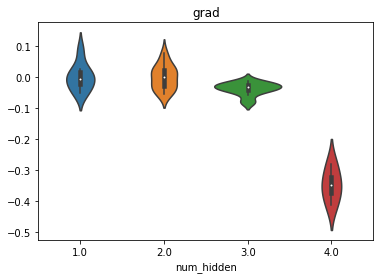

In [30]:
weights_vp(sigmoid_model3,att="grad")

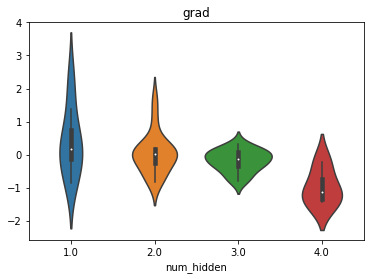

In [31]:
weights_vp(sigmoid_model3_norm,att="grad")

##**三、Z-Score数据归一化的局限**

###**3.1 Zero-Centered特性消失**

In [38]:
# 设置随机数种子
torch.manual_seed(24)  

# 学习率
lr = 0.03


# 实例化模型
tanh_model2_norm1 = tanh_class2()  
tanh_model2_norm2 = tanh_class2()  


# 进行Xavier初始化
for m in tanh_model2_norm1.modules():
  if isinstance(m, nn.Linear):
    nn.init.xavier_uniform_(m.weight)
        
for m in tanh_model2_norm2.modules():
  if isinstance(m, nn.Linear):
    nn.init.xavier_uniform_(m.weight)

In [39]:
# sigmoid_model2模型训练
train_l, test_l = model_train_test(tanh_model2_norm1, 
                  train_loader_norm,
                  test_loader,
                  num_epochs = 5, 
                  criterion = nn.MSELoss(), 
                  optimizer = optim.SGD, 
                  lr = lr, 
                  cla = False, 
                  eva = mse_cal)

# sigmoid_model2_norm模型训练
train_l_norm, test_l_norm = model_train_test(tanh_model2_norm2, 
                        train_loader_norm,
                        test_loader,
                        num_epochs = 40, 
                        criterion = nn.MSELoss(), 
                        optimizer = optim.SGD, 
                        lr = lr, 
                        cla = False, 
                        eva = mse_cal)

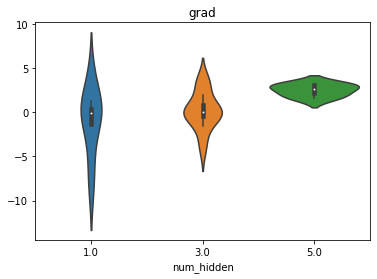

In [40]:
weights_vp(tanh_model2_norm1,att="grad")

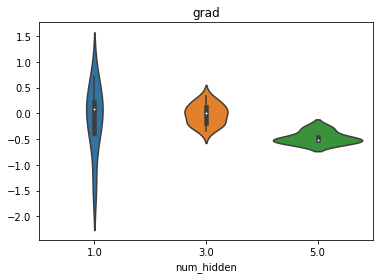

In [41]:
weights_vp(tanh_model2_norm2,att="grad")

###**3.2 Zero-Centered Data作用局限**

##**四、保证梯度平稳的第二条道路：输入数据调整**

### **4.1.归一化方法与数据分布的相互独立性**

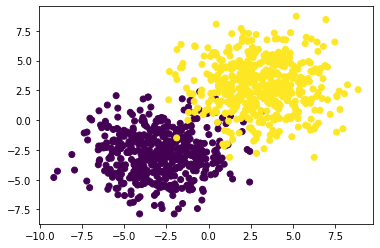

In [43]:
torch.manual_seed(420)

features,labels = tensorGenCla(num_class=2,deg_dispersion=[6,2])

plt.scatter(features[:,0],features[:,1],c=labels);

<center><font color="orange">对原数据进行平移放缩(归一化)不会影响数据分布特征

In [44]:
features

tensor([[-3.0141, -1.9911],
        [-1.6593, -3.7657],
        [-2.9395, -2.2347],
        ...,
        [ 3.9623,  3.0861],
        [ 1.4535,  0.7860],
        [-1.6681,  4.3935]])

In [45]:
f = Z_ScoreNormalization(features)
f

tensor([[-0.8529, -0.5795],
        [-0.4764, -1.0878],
        [-0.8322, -0.6492],
        ...,
        [ 1.0859,  0.8750],
        [ 0.3887,  0.2161],
        [-0.4789,  1.2495]])

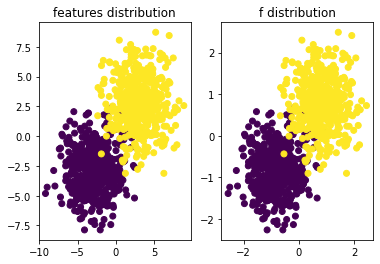

In [48]:
plt.subplot(121)
plt.scatter(features[:,0],features[:,1],c=labels)
plt.title("features distribution")
plt.subplot(122)
plt.scatter(f[:,0],f[:,1],c=labels)
plt.title("f distribution");

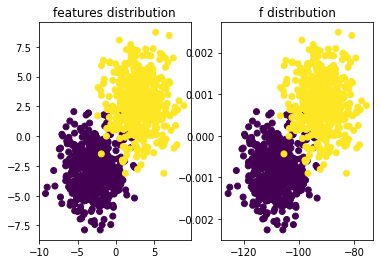

In [54]:
plt.subplot(121)
plt.scatter(features[:,0],features[:,1],c=labels)
plt.title("features distribution")
plt.subplot(122)
plt.scatter(f[:,0]*10-100,f[:,1]*0.001,c=labels)
plt.title("f distribution");

### **4.2.归一化与仿射变换**

In [55]:
f = torch.arange(1,5).reshape(2,2).float()
f

tensor([[1., 2.],
        [3., 4.]])

In [56]:
Z_ScoreNormalization(f)

tensor([[-0.7071, -0.7071],
        [ 0.7071,  0.7071]])

In [66]:
r = torch.tensor(1.)/f.std(0)
r

tensor([0.7071, 0.7071])

In [59]:
rm = torch.diag(r)
rm

tensor([[0.7071, 0.0000],
        [0.0000, 0.7071]])

In [60]:
torch.mm(f,rm)

tensor([[0.7071, 1.4142],
        [2.1213, 2.8284]])

In [64]:
b = -f.mean(0)/f.std(0)
b

tensor([-1.4142, -2.1213])

In [65]:
torch.mm(f,rm) + b 

tensor([[-0.7071, -0.7071],
        [ 0.7071,  0.7071]])